In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:/Users/RAGHAVJHA/Documents/Python Scripts/Resources-NYC Taxi Trip Project/nyc_taxi_trip_duration.csv')

In [4]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429


In [5]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

0 Missing Values in the dataset!

In [6]:
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y')

df['check_trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).map(lambda x: x.total_seconds())

duration_diff = df[np.abs(df['check_trip_duration'].values - df['trip_duration'].values) > 1]
duration_diff.shape

(0, 12)

No inconsistency in data with respect to the drop location and trip duration.

In [7]:
df['trip_duration'].describe()/3600

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

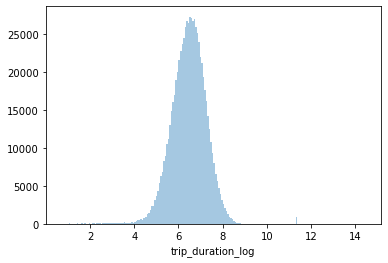

In [8]:
df['trip_duration_log'] = np.log(df['trip_duration'].values + 1)
sns.distplot(df['trip_duration_log'], kde = False, bins = 200)
plt.show()

In [9]:
df.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag              int32
trip_duration                   int64
check_trip_duration           float64
trip_duration_log             float64
dtype: object

# Univariate Analysis

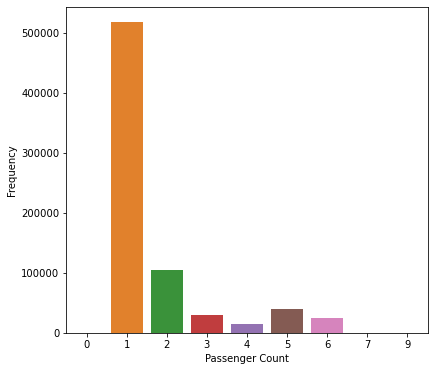

In [10]:
plt.figure(figsize=(22,6))

plt.subplot(131)
sns.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.show()

Passenger with count 1 has most number of trips.

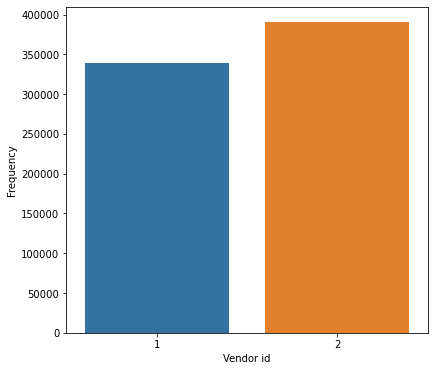

In [11]:
plt.figure(figsize=(22,6))

plt.subplot(132)
sns.countplot(df['vendor_id'])
plt.xlabel('Vendor id')
plt.ylabel('Frequency')
plt.show()

Vendor 2 has more number of trips assigned than vendor 1

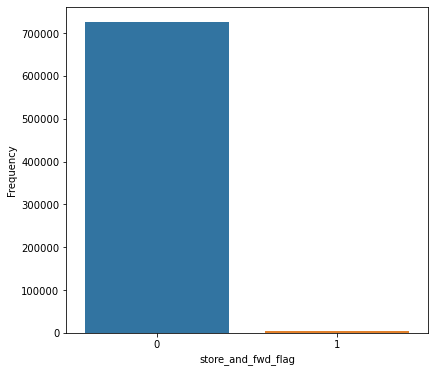

In [12]:
plt.figure(figsize=(22,6))
plt.subplot(133)
sns.countplot(df['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')
plt.show()

The store_and_fwd_flag values indicates that there is almost no storing taking place.

In [13]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

The min and max value indicates that the trips are for first six months of 2016.

In [14]:
df['dayofweek'] = df['pickup_datetime'].dt.weekday
df['hourofday'] = df['pickup_datetime'].dt.hour

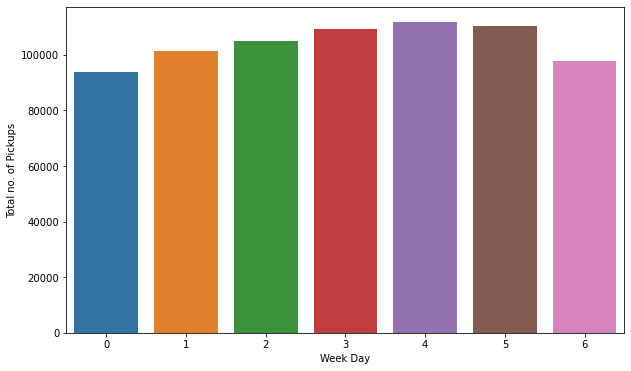

In [15]:
plt.figure(figsize=(22,6))

plt.subplot(121)
sns.countplot(df['dayofweek'])
plt.xlabel('Week Day')
plt.ylabel('Total no. of Pickups')
plt.show()

Here 0 is sunday whereas 6 is saturday and we can see the peak that is on Thursday(4) which is higher than on weekends.

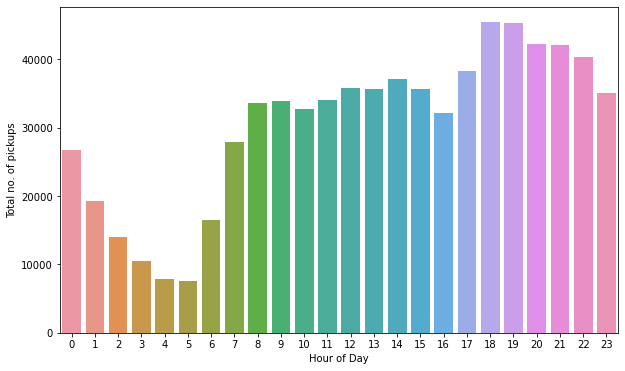

In [16]:
plt.figure(figsize=(22,6))

plt.subplot(122)
sns.countplot(df['hourofday'])
plt.xlabel('Hour of Day')
plt.ylabel('Total no. of pickups')
plt.show()

Here, the number of pickups is the highest in late evenings and low in morning hours.

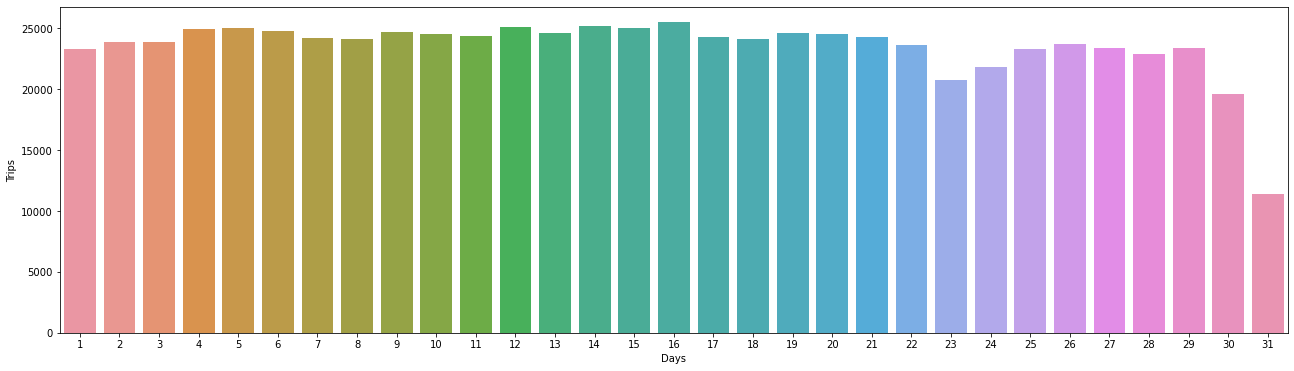

In [29]:
plt.figure(figsize=(22,6))

sns.countplot(df.pickup_datetime.dt.day)
plt.xlabel('Days')
plt.ylabel('Trips')
plt.show()

Here, we can see that number of trips are highest from day 4 to day 16 while low on 30th and 31st day.

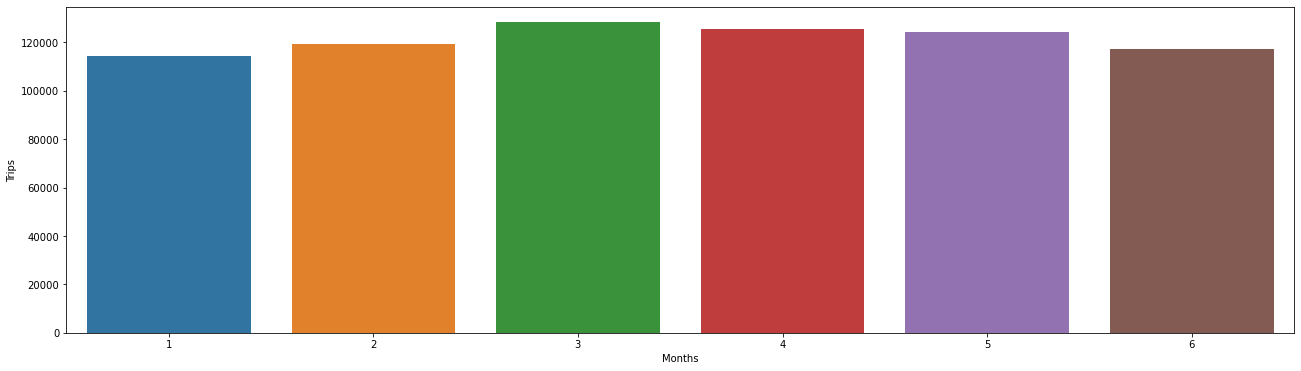

In [31]:
plt.figure(figsize=(22,6))

sns.countplot(df.pickup_datetime.dt.month)
plt.xlabel('Months')
plt.ylabel('Trips')
plt.show()

From the months, we can see that the trips took is highest in the month of March. The number 1 to 6 represents months from Jan to June.

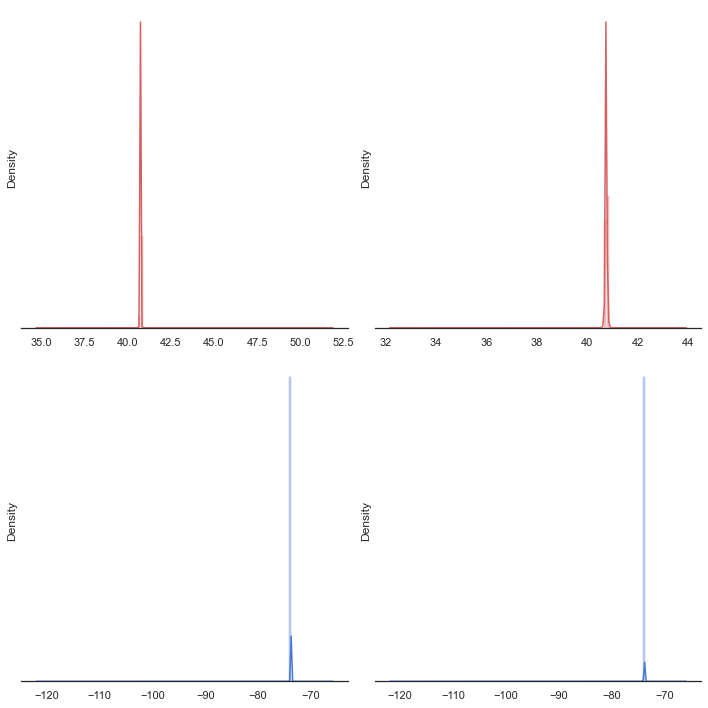

In [32]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey=False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="r",bins = 100, ax=axes[0,0])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="b",bins =100, ax=axes[1,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins =100, ax=axes[0,1])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="b",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

Blue: Pickup and dropoff longitude | Red: Pickup and dropoff latitude
The pick and drop latitude is around 40 to 41. The pick and drop longitude is around -74 to -73

# Bivariate Analysis

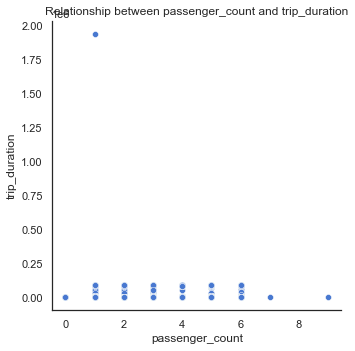

In [40]:
sns.relplot(x='passenger_count',y='trip_duration',data=df,kind='scatter')
plt.title('Relationship between passenger_count and trip_duration')
plt.show()

In [41]:
# Removing the outlier from the trip_duration
df = df[df.trip_duration!= df.trip_duration.max()]

From the plot, we can see that there is outlier, lets check in the data.

In [43]:
df[df['passenger_count'] < 1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,check_trip_duration,trip_duration_log,dayofweek,hourofday
3572,id3364866,1,2016-02-13 14:04:20,2016-02-13 14:21:29,0,-73.990479,40.742004,-73.989243,40.763680,0,1029,1029.0,6.937314,5,14
23847,id3485118,1,2016-05-11 19:15:57,2016-05-11 19:32:18,0,-73.987572,40.754566,-73.972031,40.762836,0,981,981.0,6.889591,2,19
45987,id2571672,1,2016-03-06 05:24:55,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,1,5,5.0,1.791759,6,5
76998,id1253169,1,2016-02-28 01:08:48,2016-02-28 01:09:01,0,-74.035942,40.736488,-74.035942,40.736492,0,13,13.0,2.639057,6,1
101709,id1220914,2,2016-01-17 20:51:55,2016-01-17 20:52:43,0,-73.959999,40.766861,-73.960106,40.766911,0,48,48.0,3.891820,6,20
186050,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,0,4,4.0,1.609438,4,5
186913,id3494250,1,2016-04-02 02:32:10,2016-04-02 02:50:51,0,-74.005089,40.729038,-74.032486,40.619579,0,1121,1121.0,7.022868,5,2
194926,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,0,2191,2191.0,7.692570,4,12
231010,id0959777,2,2016-03-01 19:11:26,2016-03-01 19:11:30,0,-74.003777,40.738186,-74.003807,40.738174,0,4,4.0,1.609438,1,19
247692,id2891366,1,2016-02-18 21:26:15,2016-02-18 21:28:00,0,-73.983543,40.716404,-73.983543,40.716404,0,105,105.0,4.663439,3,21


Some trips contains 0 passengers and that needs to be removed for better analysis.

In [44]:
df = df[df['passenger_count'] >= 1]

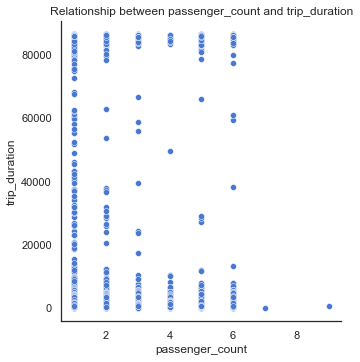

In [45]:
sns.relplot(x='passenger_count',y='trip_duration',data=df,kind='scatter')
plt.title('Relationship between passenger_count and trip_duration')
plt.show()

From the plot, there exists no relationship between passenger_count and trip_duration. Even if the passenger count is high there are no records of long duration trips.

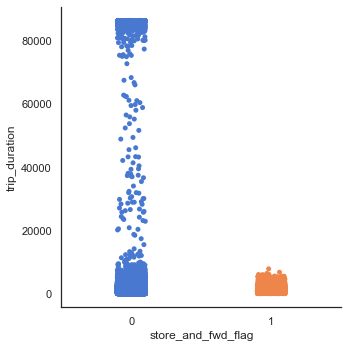

In [46]:
sns.catplot(x='store_and_fwd_flag',y='trip_duration',kind='strip',data=df)

Only short distances trips had connection issues with the server.

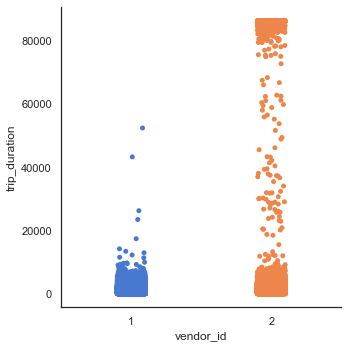

In [48]:
sns.catplot(x='vendor_id',y='trip_duration',kind='strip',data=df)

From the plot we can say that Vendor 1 provides cabs only for short distance trips. Vendor 2 provides cab for all kind of trips.

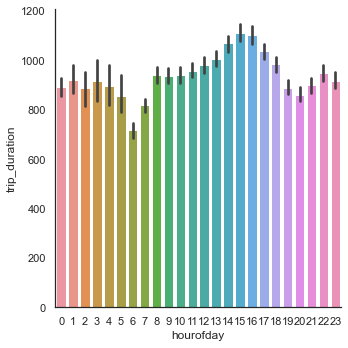

In [52]:
sns.catplot(x='hourofday',y='trip_duration',data=df,kind ='bar')

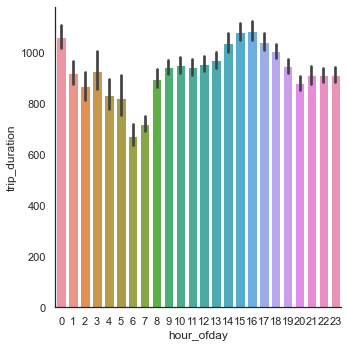

In [53]:
df['hour_ofday'] = df['dropoff_datetime'].dt.hour
sns.catplot(x='hour_ofday',y='trip_duration',data=df,kind ='bar')

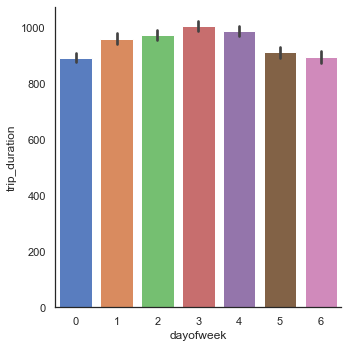

In [57]:
sns.catplot(x='dayofweek',y='trip_duration',data=df,kind ='bar',orient='vertical')

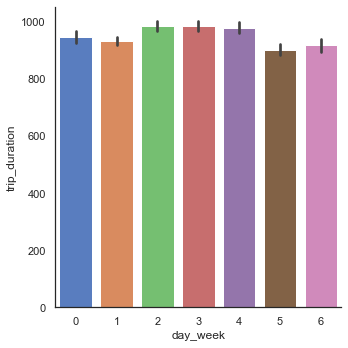

In [58]:
df['day_week'] = df['dropoff_datetime'].dt.weekday
sns.catplot(x='day_week',y='trip_duration',data=df,kind ='bar',orient='vertical')

Thus the highest avg time taken to complete a trip is on Wednesday and Thursday. 